## Business Understanding

Healthcare providers face significant challenges in the timely identification and treatment of sepsis. Delays in diagnosis can result in severe complications, extended hospital stays, increased healthcare costs, and a higher risk of mortality. Leveraging machine learning, we aim to create a predictive model to help healthcare professionals identify high-risk patients early, thus improving patient care and reducing costs.

Objectives:
- Early Sepsis Detection: Develop an accurate and reliable machine learning model to predict the onset of sepsis in ICU patients.
- Enhanced Patient Outcomes: Enable timely medical interventions to improve patient survival rates and reduce sepsis-related mortality.
- Cost Reduction: Lower healthcare costs associated with prolonged ICU stays and sepsis treatment by preventing severe cases through early detection.
- Resource Optimization: Optimize the use of medical resources by identifying patients needing urgent attention, thereby increasing the overall efficiency of ICU operations.

## Data Understanding
- ID: number to represent patient ID
- PRG: Plasma glucose
- PL: Blood Work Result-1 (mu U/ml)
- PR: Blood Pressure (mm Hg)
- SK: Blood Work Result-2 (mm)
- TS: Blood Work Result-3 (mu U/ml)
- M11: Body mass index (weight in kg/(height in m)^2
- BD2: Blood Work Result-4 (mu U/ml)
- Age: patients age (years)
- Insurance: If a patient holds a valid insurance card
- Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

#### Null Hypothesis
- There is a relationship between a patients body mass index and their blood pressure

#### Alternate Hypothesis
- There is no relationship between a patients body mass index and their blood pressure

Analytical Questions
- Does a patient having an insurance influence their chances of developing a sepsis?
- What age group are more likely to develop Sepsis in ICU?
- Is there a relationship between plasma glucose and body mass index?

In [64]:
## Importing libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline  
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.model_selection
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [65]:
df_test = pd.read_csv("Paitients_Files_Test.csv")

In [66]:
## Loading the dataset

df = pd.read_csv("Paitients_Files_Train.csv")
df.head(10)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
5,ICU200015,5,116,74,0,0,25.6,0.201,30,1,Negative
6,ICU200016,3,78,50,32,88,31.0,0.248,26,0,Positive
7,ICU200017,10,115,0,0,0,35.3,0.134,29,1,Negative
8,ICU200018,2,197,70,45,543,30.5,0.158,53,1,Positive
9,ICU200019,8,125,96,0,0,0.0,0.232,54,1,Positive


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [68]:
## Checking missing values
df.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [69]:
##checking for duplicates
df.duplicated().sum()

0

#### Exploratory Data Analysis


In [70]:
##checking info on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [71]:
##checking the stats for the various columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,599,599,ICU200010,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRG,599.0,NaN,NaN,NaN,3.824708,3.362839,0.0,1.0,3.0,6.0,17.0
PL,599.0,NaN,NaN,NaN,120.153589,32.682364,0.0,99.0,116.0,140.0,198.0
PR,599.0,NaN,NaN,NaN,68.732888,19.335675,0.0,64.0,70.0,80.0,122.0
SK,599.0,NaN,NaN,NaN,20.562604,16.017622,0.0,0.0,23.0,32.0,99.0
TS,599.0,NaN,NaN,NaN,79.460768,116.576176,0.0,0.0,36.0,123.5,846.0
M11,599.0,NaN,NaN,NaN,31.920033,8.008227,0.0,27.1,32.0,36.55,67.1
BD2,599.0,NaN,NaN,NaN,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,NaN,NaN,NaN,33.290484,11.828446,21.0,24.0,29.0,40.0,81.0
Insurance,599.0,NaN,NaN,NaN,0.686144,0.464447,0.0,0.0,1.0,1.0,1.0


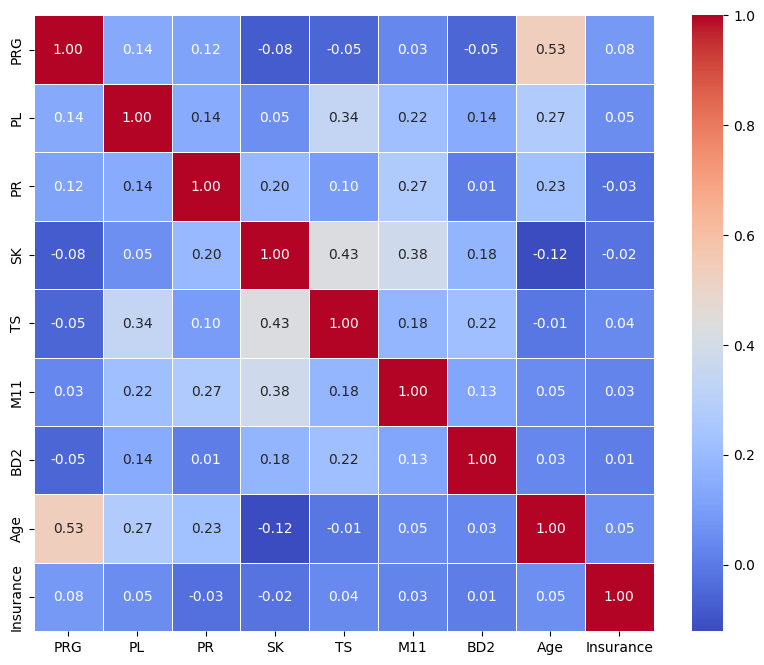

In [72]:
## checking correlation
df_c = df.drop(columns=["Sepssis", "ID"])
df_corr = df_c.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.show()


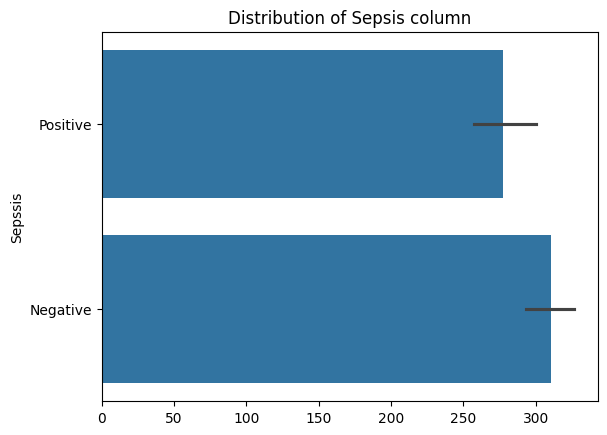

In [73]:
## plotting a bar chart of the sepsis column
sns.barplot(df["Sepssis"])
plt.title("Distribution of Sepsis column")
plt.show()

In [74]:
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


Observation
- We can see that most of the columns are not normally distributed since the mean and median values are not so close
- Also we need to take note of the imbalanced dataset, that is, Sepssis column has more negatives than positives and this could affect our models prediction is being biased toward one side of the dataset

In [75]:
##dropping the column ID
df = df.drop(columns="ID")

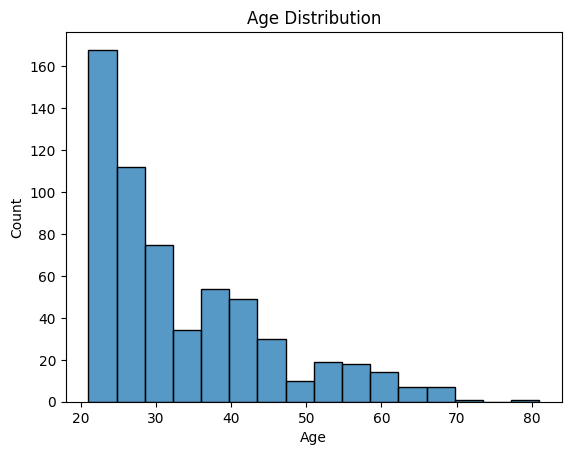

In [76]:
##checking the Age distribution
sns.histplot(df["Age"])
plt.title("Age Distribution")
plt.show()

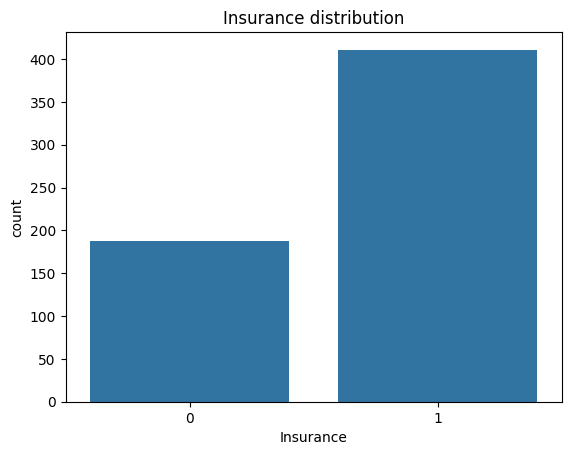

In [77]:
sns.barplot(df["Insurance"].value_counts())
plt.title("Insurance distribution")
plt.show()

In [78]:
df.head(10)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive
5,5,116,74,0,0,25.6,0.201,30,1,Negative
6,3,78,50,32,88,31.0,0.248,26,0,Positive
7,10,115,0,0,0,35.3,0.134,29,1,Negative
8,2,197,70,45,543,30.5,0.158,53,1,Positive
9,8,125,96,0,0,0.0,0.232,54,1,Positive


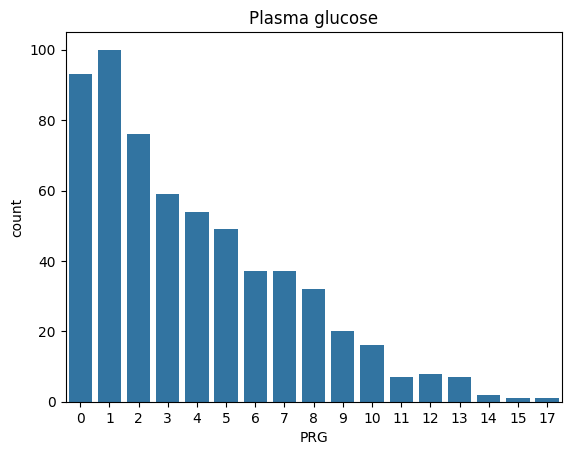

In [79]:
sns.barplot(df["PRG"].value_counts())
plt.title("Plasma glucose")
plt.show()

In [80]:
df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive


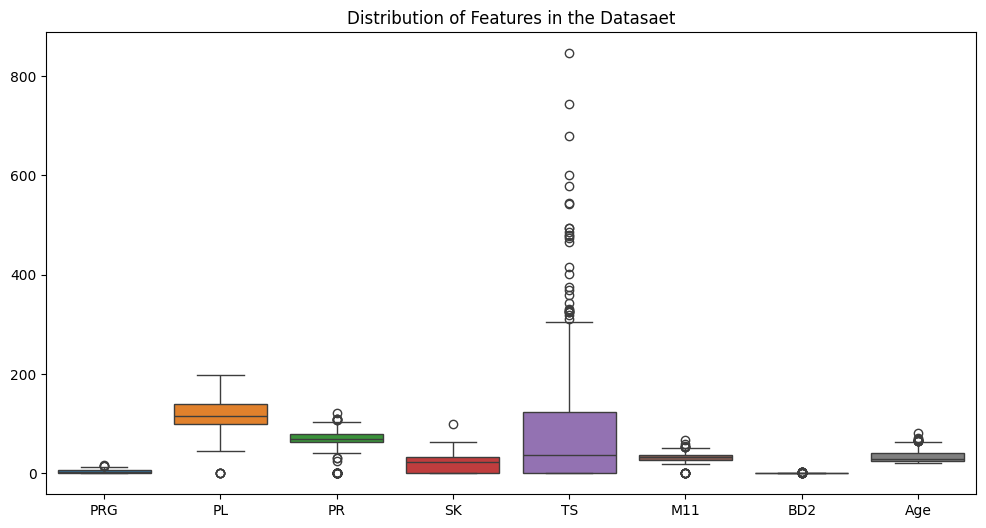

In [81]:
## Checking the distribution of Features in the dataset
plt.figure(figsize=(12,6))
plt.title("Distribution of Features in the Datasaet")
sns.boxplot(data=df.drop(columns=["Sepssis", "Insurance"]))
plt.show()

##### Key Observations
- Majority of the patients have insurance
- All the blood work results seem to have outliers (We might have to truncate it or set a lower and upper bound for model efficiency)
- Majority of the patients are in their 20s and the number of patients reduces as age increases

#### Answering analytical questions


1. - Does a patient having an insurance influence their chances of developing a sepsis?

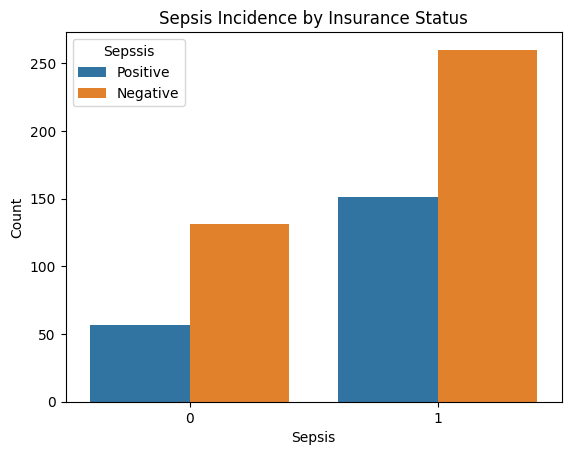

In [82]:
sns.countplot(data=df, x="Insurance", hue="Sepssis")
plt.xlabel('Sepsis')
plt.ylabel('Count')
plt.title('Sepsis Incidence by Insurance Status')
plt.show()


- What age group are more likely to develop Sepsis in ICU?

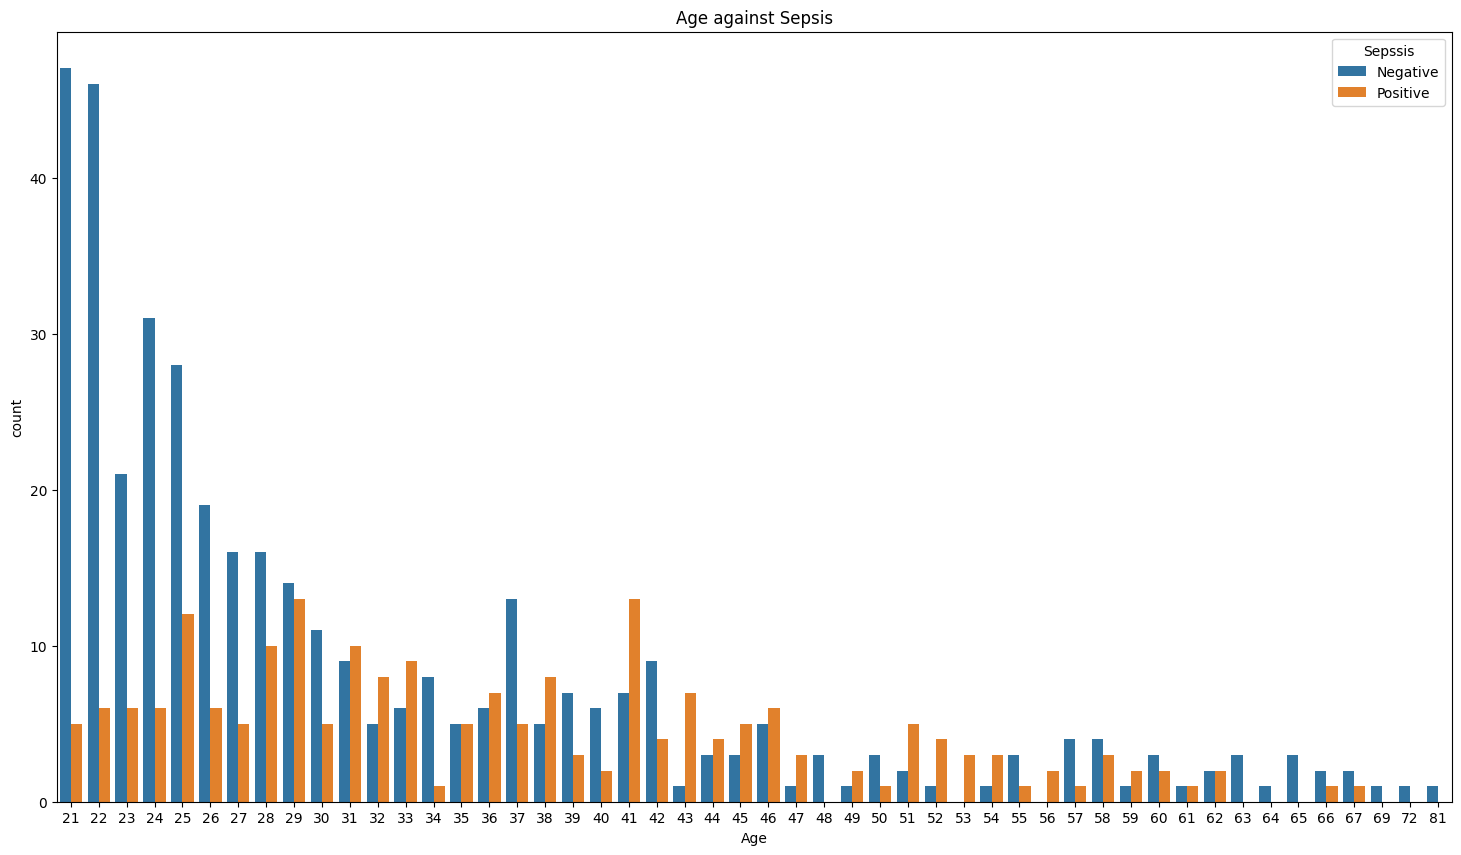

In [83]:
fig = plt.figure(figsize=(18,10))
sns.countplot(data=df, x="Age", hue="Sepssis")
plt.title("Age against Sepsis")
plt.show()

In [84]:
df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive


Hypothesis Testing

In [85]:

# Creating a contigency table
contingency_table = pd.crosstab(df['M11'], df['PR'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# printing results of the p-value
print("P-value:", p)

# printing Results of the t-test
# having alpha to be 0.05(level of significance)
alpha = 0.01
if p < alpha:
    print("Reject the null hypothesis - There is a significant relationship between Patient Body Mass Index terms and Blood Pressure.")
else:
    print("Fail to reject the null hypothesis - There is no significant relationship between Body Mass Index and Blood Pressure.")

P-value: 3.1410804891987544e-09
Reject the null hypothesis - There is a significant relationship between Patient Body Mass Index terms and Blood Pressure.


In [86]:
## Changing 1s and 0s in the Insurance colun into No and Yes

df["Insurance"] = df["Insurance"].map({0:"No", 1:"Yes"})
df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,No,Positive
1,1,85,66,29,0,26.6,0.351,31,No,Negative
2,8,183,64,0,0,23.3,0.672,32,Yes,Positive
3,1,89,66,23,94,28.1,0.167,21,Yes,Negative
4,0,137,40,35,168,43.1,2.288,33,Yes,Positive


### Data Preprocessing

In [87]:
label_enc = LabelEncoder()

In [88]:
X = df.drop(columns="Sepssis")
y = df["Sepssis"]

#### Handling Outliers

In [89]:
## Replacing the outliers with the upper and lower bounds 
def replace_outliers(X, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column_name] = df[column_name].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    
    return df

In [90]:
def process_columns(X):
    
    numeric_cols = []
    categorical_cols = []
    for column in X.columns:
        if X[column].dtype != 'object':
            X = replace_outliers(X, column)
            numeric_cols.append(column)
        else:
            categorical_cols.append(column)
    return X, numeric_cols, categorical_cols

In [91]:
X, numeric_cols, categorical_cols  = process_columns(X)

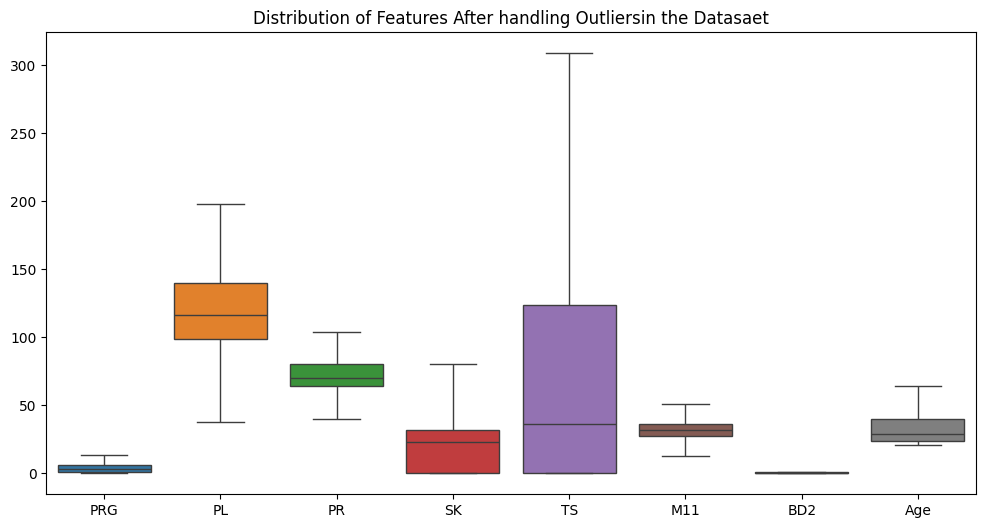

In [92]:
plt.figure(figsize=(12,6))
plt.title("Distribution of Features After handling Outliersin the Datasaet")
sns.boxplot(data=X)
plt.show()

In [103]:
# encoding the target y
y_encoded = label_enc.fit_transform(y)

In [104]:
y_encoded[0:5]

array([1, 0, 1, 0, 1])

In [105]:
## Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#### Numerical and Categorical Pipeline 

In [106]:
## creating pipeline for Preprocessing of categorical and numeric columns 
numerical_pipeline = Pipeline(steps=[ 
    ("num_imputer", SimpleImputer(strategy="median")), 
    ("scaler", StandardScaler())
])
categorical_pipeline = Pipeline(steps=[
    ("cat_imputer", SimpleImputer(strategy="most_frequent")), 
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_pipeline", numerical_pipeline, numeric_cols)
])

In [107]:
best_params_dict = {}
# Create pipelines for each model
pipelines = [
    ("XGBClassifier", Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", XGBClassifier(random_state=42))
    ])),
    ("Logistic Regression", Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(random_state=42))
    ])),
    ("Decision Tree", Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", DecisionTreeClassifier(random_state=42))
    ])),
    ("Random Forest", Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(random_state=42))
    ]))
]

In [108]:
# Define hyperparameter grids for each model
param_grids = {
    "XGBClassifier": {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.3]
    },
    "Logistic Regression": {
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [0.1, 1, 10]
    },
    "Decision Tree": {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 5, 10, 20]
    },
    "Random Forest": {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 5, 10, 20]
    }
}

# Perform GridSearchCV for each model
for model_name, Pipeline in pipelines:
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(estimator=pipelines, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params_dict[model_name] = grid_search.best_params_

##best params for each model    
best_params_dict


InvalidParameterError: The 'estimator' parameter of GridSearchCV must be an object implementing 'fit'. Got [('XGBClassifier', Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['PRG', 'PL', 'PR', 'SK',
                                                   'TS', 'M11', 'BD2',
                                                   'Age'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsampl...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])), ('Logistic Regression', Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['PRG', 'PL', 'PR', 'SK',
                                                   'TS', 'M11', 'BD2',
                                                   'Age'])])),
                ('classifier', LogisticRegression(random_state=42))])), ('Decision Tree', Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['PRG', 'PL', 'PR', 'SK',
                                                   'TS', 'M11', 'BD2',
                                                   'Age'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])), ('Random Forest', Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['PRG', 'PL', 'PR', 'SK',
                                                   'TS', 'M11', 'BD2',
                                                   'Age'])])),
                ('classifier', RandomForestClassifier(random_state=42))]))] instead.

In [44]:
models = [
    ("Logistic Regression", LogisticRegression(random_state=42, C=0.1, penalty='l2')),
    ("Decision Tree", DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=5)),
    ("Random Forest", RandomForestClassifier(random_state=42, max_depth=10, n_estimators=300)),
    ("XGBoost", XGBClassifier(random_state=42, learning_rate=0.01, max_depth=5, n_estimators=200))
]

In [51]:
all_pipeline={}
all_confusion_matrix={}

##creating dataframe to store all metrics
metric_table = pd.DataFrame(columns=["model", "precision", "recall", "f1-score"])

for model_name, classifier in models:

    final_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", classifier)
    ])

    
    # fit data to pipeline
    final_pipeline.fit(X_train, y_train)

    #Add all pipelines into the all_balanced_pipeline dictionary
    all_pipeline[model_name] = final_pipeline
    
    #predicting on evaluation set
    y_pred = final_pipeline.predict(X_test)

    ##confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    ## Adding all confusion matrix into the all_confusion_matrix dictionary
    all_confusion_matrix[model_name] = conf_matrix

    ##generating classification report for each model or pipeline
    metrics = classification_report(y_test, y_pred, output_dict=True)

    ##getting all metrics
    accuracy = metrics["accuracy"]
    precision = metrics["weighted avg"]["precision"]
    recall = metrics["weighted avg"]["recall"]
    f1_score = metrics["weighted avg"]["f1-score"]
    

    print(f"{model_name} model is trained")
   
    # Save the trained pipeline
    filename = f'models/{model_name.replace(" ", "_")}.pkl'
    joblib.dump(final_pipeline, filename)

    print(f'Saved {model_name} pipeline to {filename}')
    
    ## add key metrics to the metrics table
    metric_table.loc[len(metric_table)] = [model_name, precision, recall, f1_score]
    

metric_table.sort_values(by="f1-score", ascending=False)

Logistic Regression model is trained
Saved Logistic Regression pipeline to models/Logistic_Regression.pkl
Decision Tree model is trained
Saved Decision Tree pipeline to models/Decision_Tree.pkl
Random Forest model is trained
Saved Random Forest pipeline to models/Random_Forest.pkl
XGBoost model is trained
Saved XGBoost pipeline to models/XGBoost.pkl


,model,precision,recall,f1-score
3,XGBoost,0.764547,0.766667,0.765385
0,Logistic Regression,0.743950,0.750000,0.743352
2,Random Forest,0.716667,0.716667,0.716667
1,Decision Tree,0.708065,0.716667,0.697619


In [53]:
label_enc = LabelEncoder()
label_enc.fit_transform(y)
##save the lebel encoder to models
joblib.dump(label_enc, 'models/label_encoder.pkl')

['models/label_encoder.pkl']

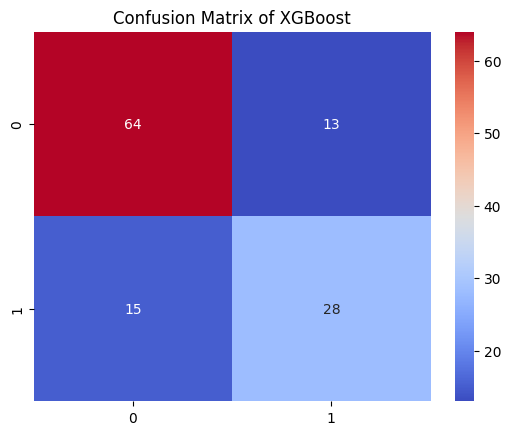

In [54]:
## checking the confusion matrix of the top two models (XGBoost and Logistic Regression)
conf_mat = all_confusion_matrix["XGBoost"]
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix of XGBoost")
plt.show()

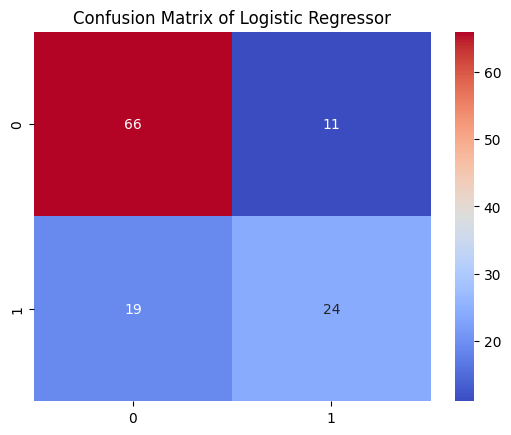

In [55]:
## checking the confusion matrix of the top two models (Random Forest and Logistic Regression)
conf_mat = all_confusion_matrix["Logistic Regression"]
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix of Logistic Regressor")
plt.show()


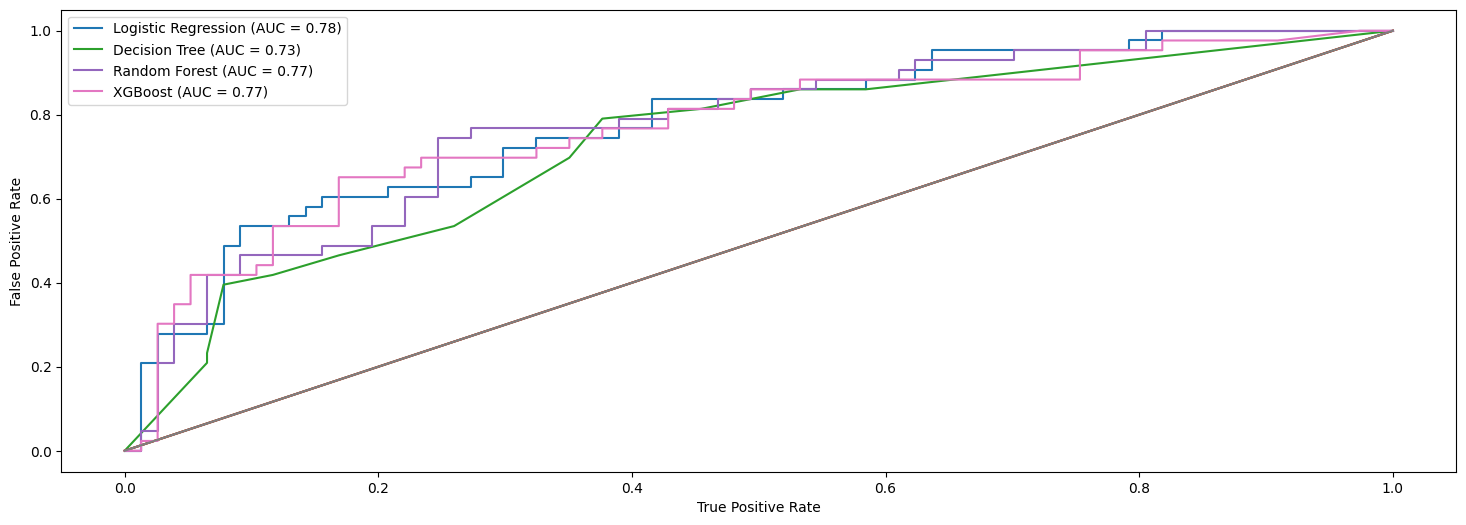

In [56]:
fig, ax = plt.subplots(figsize=(18, 6))

all_confusion_matrix = {}
all_roc_data = {}

for model_name, Pipeline in all_pipeline.items():

    y_score = Pipeline.predict_proba(X_test)[:, 1]  

    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    roc_auc = auc(fpr, tpr)

    roc_data_df = pd.DataFrame({"False Postive rate": fpr, "True Positive rate": tpr, "Threshold": thresholds})

    all_roc_data[model_name] = roc_data_df

    ax.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

    ax.plot([0,1], [0,1])
    ax.set_ylabel("False Positive Rate")
    ax.set_xlabel("True Positive Rate")
plt.legend()
plt.show()


Observations from ROC Curve
- We see that Logistic Regression has a relatively higher AUC indicating it has the potential of predicting much better than XGBoost across different thresholds
- XGBoost comes in second, even though it had the highest ratings in terms of metrics

In [57]:
## Performance of XGBoost by threshold
all_roc_data["Logistic Regression"].tail(10)

,False Postive rate,True Positive rate,Threshold
32,0.584416,0.883721,0.161294
33,0.623377,0.883721,0.132579
34,0.623377,0.906977,0.127673
35,0.636364,0.906977,0.123735
36,0.636364,0.953488,0.121564
37,0.792208,0.953488,0.079653
38,0.792208,0.976744,0.078860
39,0.818182,0.976744,0.071864
40,0.818182,1.000000,0.066236
41,1.000000,1.000000,0.009303


In [58]:
## Performance of XGBoost by threshold
all_roc_data["XGBoost"].tail(10)

,False Postive rate,True Positive rate,Threshold
30,0.493506,0.860465,0.173159
31,0.532468,0.860465,0.147976
32,0.532468,0.883721,0.137674
33,0.753247,0.883721,0.078157
34,0.753247,0.953488,0.068891
35,0.818182,0.953488,0.064265
36,0.818182,0.976744,0.061771
37,0.909091,0.976744,0.055287
38,0.974026,1.000000,0.055155
39,1.000000,1.000000,0.054954


Observations and Key Insights
- At Threshold: 0.061771, 
XGBoost yields its best performance, as it achieves a high TPR of 97.67% with an FPR of 81.82%, indicating a good balance between being able to correctly predict high number of patients susceptible to sepsis(with a 97.67% accuracy) in ICU and patients that are not potentially susceptible to sepsis(with a 81.82% accuracy)

- At Threshold: 0.071864, 
Logistic Regressor model strikes a good balance between detecting sepsis cases (high TPR) while minimizing the number of false alarms (lower FPR), with a TPR of 97.67% and FPR of 81.82%

### Confusion Matrix After Threshold Optimization

In [59]:
# Assinging a threshold to the XGBoost model to predict the Sepsis
threshold = 0.061771
y_pred_proba = all_pipeline["XGBoost"].predict_proba(X_test)[:,1]
binary_predictions = np.where(y_pred_proba > threshold, 1, 0)
threshold_matrix = confusion_matrix(y_test, binary_predictions)

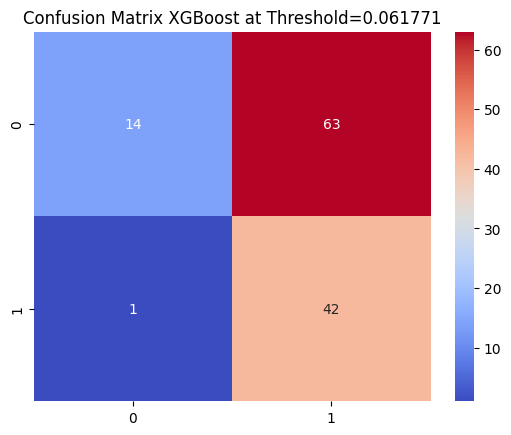

In [60]:

## Visualizing the improvement of our XGBoost model to predict more True positives after changing the threshold to 0.061
sns.heatmap(threshold_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix XGBoost at Threshold=0.061771")
plt.show()

In [61]:
# Assinging a threshold to the Logistic Regression model to predict the Sepsis
threshold = 0.071864
y_pred_proba = all_pipeline["Logistic Regression"].predict_proba(X_test)[:,1]
binary_predictions = np.where(y_pred_proba > threshold, 1, 0)
threshold_matrix_lr = confusion_matrix(y_test, binary_predictions)

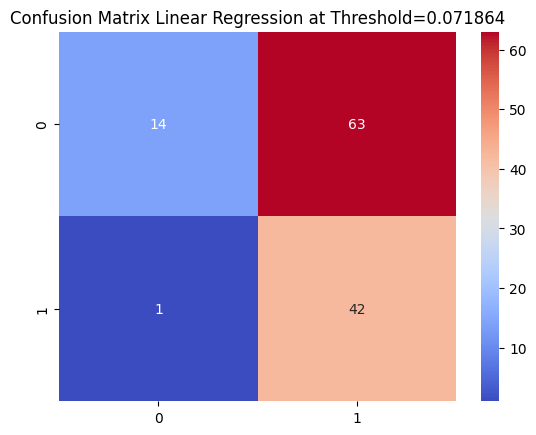

In [62]:
## Visualizing the improvement of our Linear Regression model to predict more True positives after changing the threshold to 0.071864
sns.heatmap(threshold_matrix_lr, annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix Linear Regression at Threshold=0.071864")
plt.show()

Observations from Confusion matrix with updated thresholds
- The XGBoost model has its True postives increased from 28 to 42 and FPR from 15 to 1(which is good) after updating the threshold to 0.061771

- The Logistic Regression model has its True postives increased from 24 to 42 and FPR from 19 to 1(which is good) after updating the threshold to 0.071864

- This explains why Logistic Regression model had a slightly higher AUC as compared to XGBoost. 